In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ticker = 'HDFCBANK.NS' 
start_date = '2015-01-01'
end_date = '2024-12-31'

data = yf.download(ticker, start=start_date, end=end_date, interval='1d')


data['change'] = ((data['Close'] - data['Open'])/data['Open'])*100
data['day'] = data.index.day_name()
Monday = data[data['day'] == 'Monday']
Tuesday = data[data['day'] == 'Tuesday']
Wednesday = data[data['day'] == 'Wednesday']
Thursday = data[data['day'] == 'Thursday']
Friday = data[data['day'] == 'Friday']

[*********************100%%**********************]  1 of 1 completed


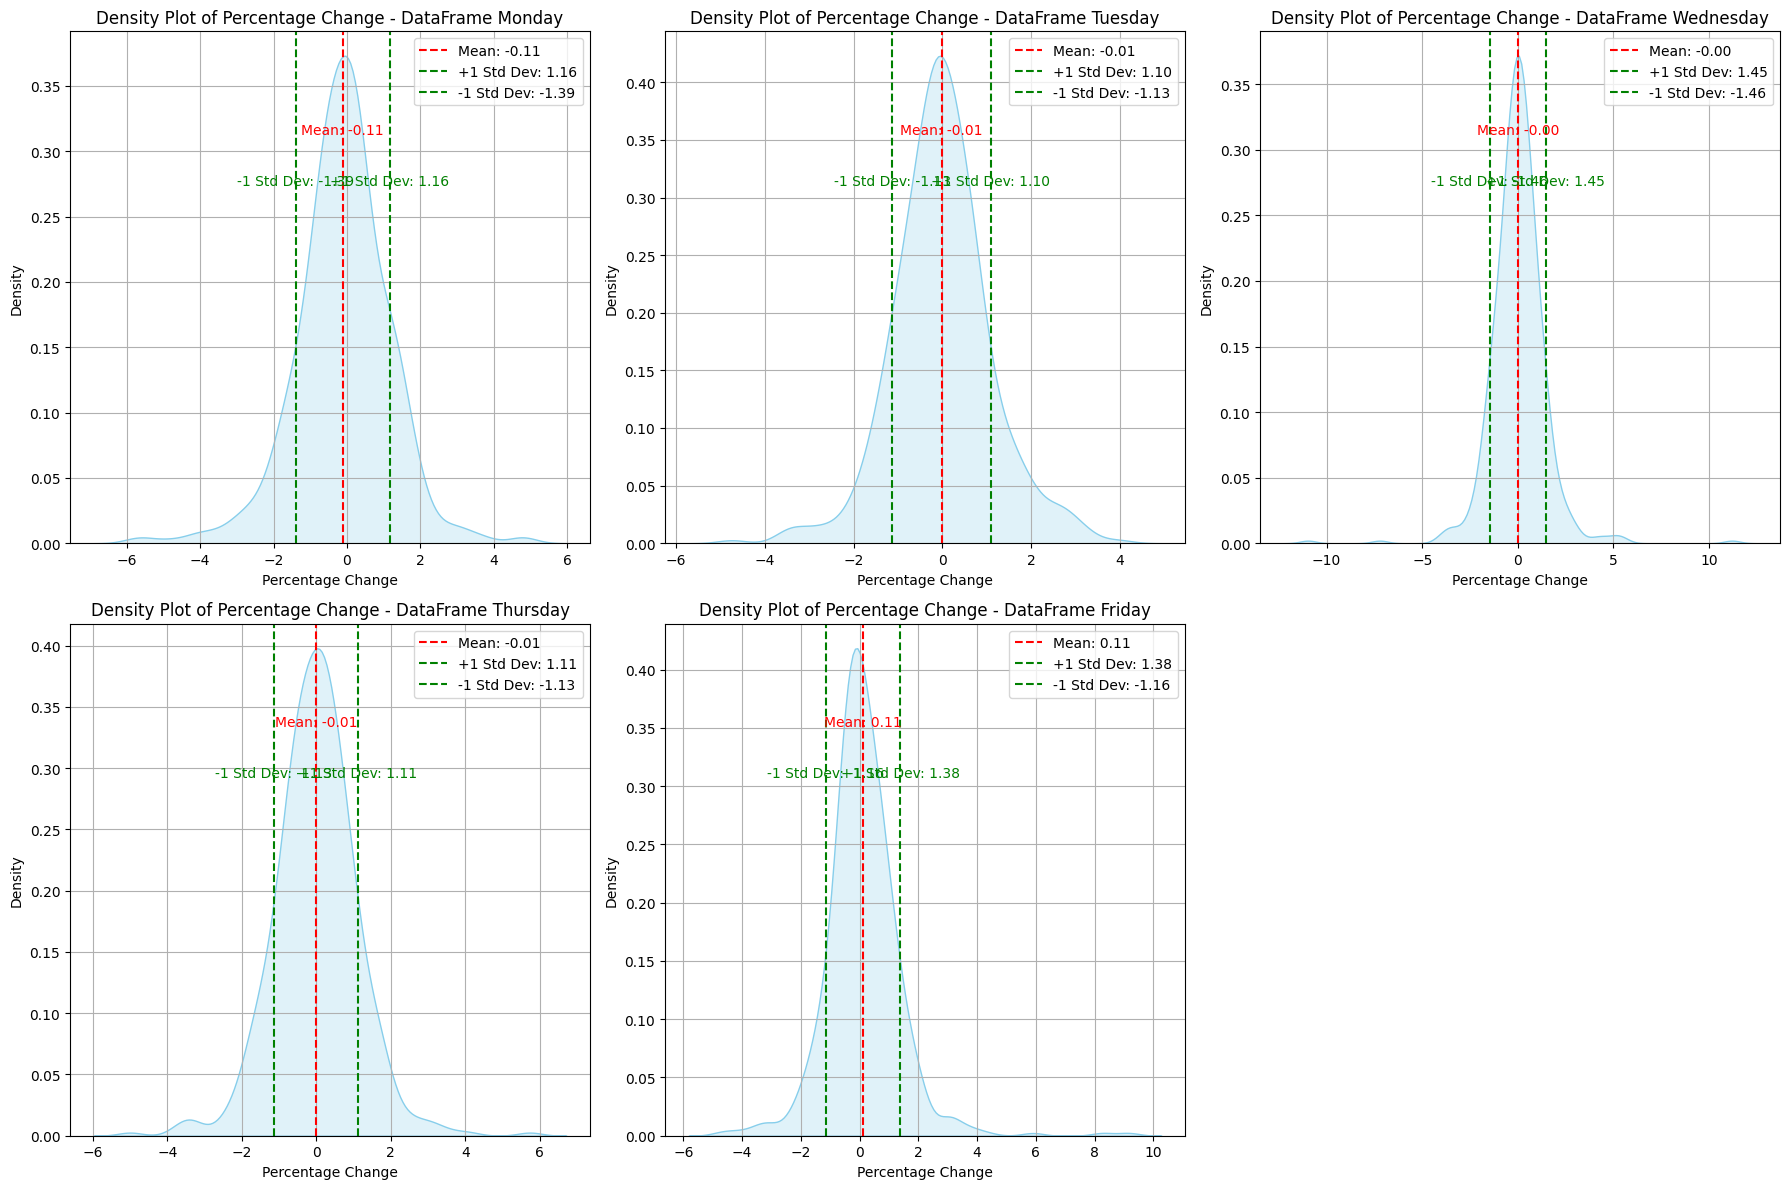

In [2]:
dfs = [Monday , Tuesday , Wednesday , Thursday , Friday]
plt.figure(figsize=(18, 12))  
weekName = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday']
for i, df in enumerate(dfs):
    plt.subplot(2, 3, i + 1)  
    sns.kdeplot(df['change'], fill=True, color='skyblue')

    #  mean and std
    mean = df['change'].mean()
    std = df['change'].std()

    # ploting mean and std
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='g', linestyle='--', label=f'+1 Std Dev: {mean + std:.2f}')
    plt.axvline(mean - std, color='g', linestyle='--', label=f'-1 Std Dev: {mean - std:.2f}')

    
    plt.text(mean, plt.ylim()[1] * 0.8, f'Mean: {mean:.2f}', color='r', ha='center')
    plt.text(mean + std, plt.ylim()[1] * 0.7, f'+1 Std Dev: {mean + std:.2f}', color='g', ha='center')
    plt.text(mean - std, plt.ylim()[1] * 0.7, f'-1 Std Dev: {mean - std:.2f}', color='g', ha='center')

    
    plt.title(f'Density Plot of Percentage Change - DataFrame {weekName[i]}')
    plt.xlabel('Percentage Change')
    plt.ylabel('Density')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

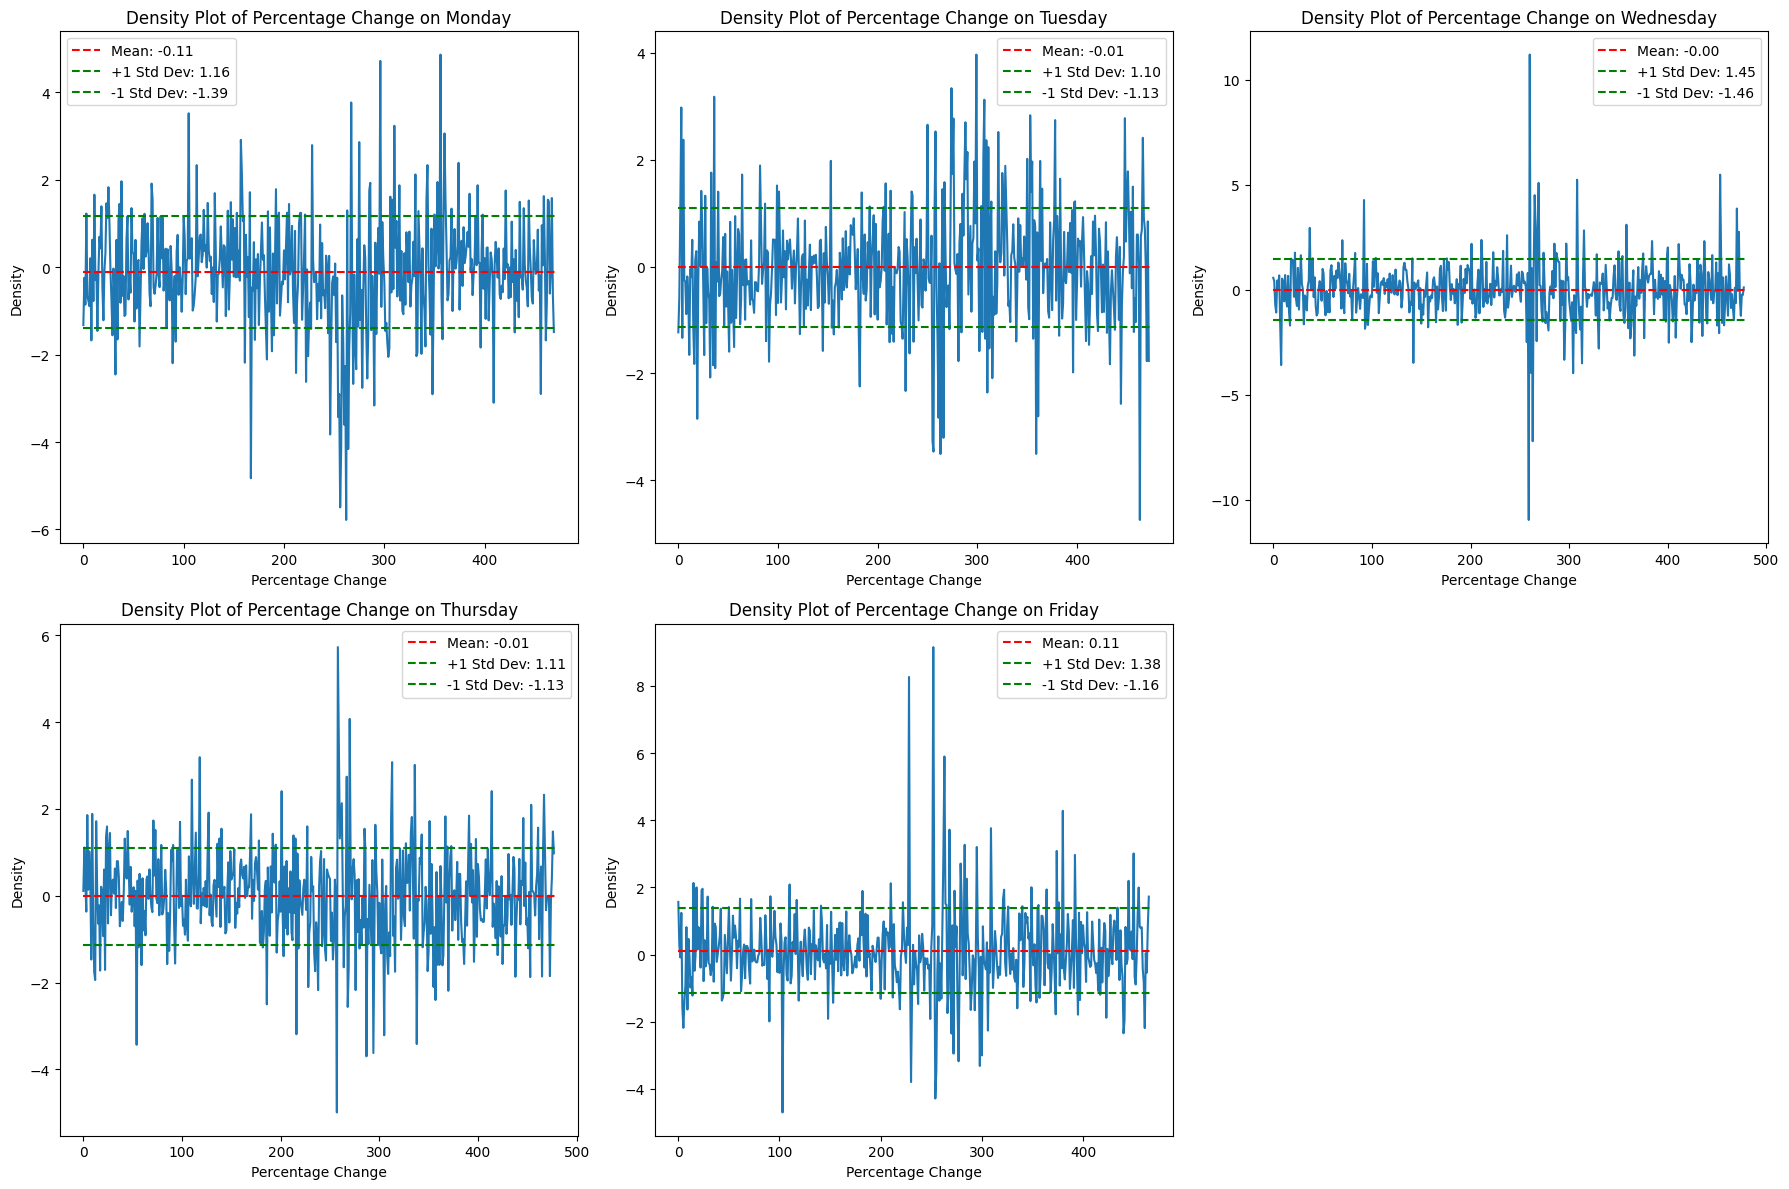

In [3]:
dfs = [Monday , Tuesday , Wednesday , Thursday , Friday]
plt.figure(figsize=(18, 12))  # Set the figure size to accommodate all subplots

for i, df in enumerate(dfs):
    plt.subplot(2, 3, i + 1) 
    df = df.reset_index(drop=True)
    plt.plot(df.index, df['change'], linestyle='-')

 
    mean = df['change'].mean()
    std = df['change'].std()

    plt.hlines(mean,xmin=0,xmax=len(df), color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.hlines(mean + std,xmin=0,xmax=len(df), color='g', linestyle='--', label=f'+1 Std Dev: {mean + std:.2f}')
    plt.hlines(mean - std,xmin=0,xmax=len(df), color='g', linestyle='--', label=f'-1 Std Dev: {mean - std:.2f}')

    plt.title(f'Density Plot of Percentage Change on {weekName[i]}')
    plt.xlabel('Percentage Change')
    plt.ylabel('Density')
    # plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()